In [3]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [4]:
#Reading the data
files = glob.glob("*cybersecurity_attacks_cleaned.csv")


In [5]:
#Creating a list of dataframes
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))
    

In [6]:
#Concatenating all dataframes into one
df = pd.concat(dfs, ignore_index=True)

#Checking the shape of the dataframe
print(df.shape)

(40000, 30)


In [7]:
#display random 15 rows
df.sample(15)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Year,Month,Date,Hour,Day
1306,2022-09-29 04:53:02,165.16.1.71,51.169.32.144,35135,25327,TCP,101,Data,DNS,Perspiciatis quos eligendi officia. Sed pariat...,...,"Parbhani, Haryana",No Proxy,NaN,NaN,Server,2022,September,29,4,Thursday
24457,2022-11-22 23:24:16,47.124.0.154,110.19.164.225,59684,6938,UDP,763,Control,HTTP,Est impedit assumenda quidem. Rem fuga nobis r...,...,"Guntakal, Tamil Nadu",35.242.163.14,Log Data,Alert Data,Firewall,2022,November,22,23,Tuesday
23221,2020-01-30 02:07:49,22.0.203.82,101.255.86.74,62485,6428,UDP,377,Control,DNS,Assumenda distinctio consequatur quo vel nemo ...,...,"Hazaribagh, Meghalaya",51.226.7.92,NaN,NaN,Server,2020,January,30,2,Thursday
5385,2021-11-26 15:59:14,70.60.109.138,77.133.147.146,39807,33687,ICMP,1387,Control,HTTP,Mollitia provident quis molestias eius laudant...,...,"Sambhal, Odisha",No Proxy,NaN,NaN,Firewall,2021,November,26,15,Friday
33502,2022-06-20 23:32:20,83.171.150.6,60.179.1.186,21994,32813,UDP,803,Control,FTP,Esse quisquam doloremque eveniet maxime dicta....,...,"Tiruchirappalli, Mizoram",No Proxy,NaN,NaN,Firewall,2022,June,20,23,Monday
12242,2022-10-11 16:09:37,8.68.28.24,106.146.168.147,33112,55968,ICMP,415,Control,HTTP,Quibusdam eligendi voluptatem nisi mollitia. E...,...,"Durgapur, Gujarat",114.54.233.110,NaN,NaN,Firewall,2022,October,11,16,Tuesday
26942,2020-09-17 20:38:14,164.219.241.44,170.28.159.255,65507,21639,UDP,163,Control,DNS,Quasi necessitatibus minus laudantium similiqu...,...,"Nagpur, Kerala",93.155.45.35,Log Data,Alert Data,Firewall,2020,September,17,20,Thursday
35395,2021-04-03 02:15:08,190.200.42.101,151.134.107.1,55658,25712,TCP,1468,Control,DNS,Laborum tempore veritatis eaque tenetur tempor...,...,"Kharagpur, West Bengal",32.30.179.171,Log Data,Alert Data,Firewall,2021,April,3,2,Saturday
32617,2020-03-27 17:04:26,86.211.34.245,216.89.19.11,24522,35301,UDP,958,Data,FTP,Ullam ut quo inventore. Eligendi rerum consequ...,...,"Arrah, Maharashtra",163.108.228.184,NaN,NaN,Firewall,2020,March,27,17,Friday
5636,2022-05-03 01:57:52,93.244.105.189,184.156.40.48,9813,19178,TCP,341,Control,HTTP,Alias quaerat saepe quis tempore. Eos tempore ...,...,"Kakinada, Punjab",15.223.2.203,Log Data,Alert Data,Server,2022,May,3,1,Tuesday


In [8]:
#Checking the data types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

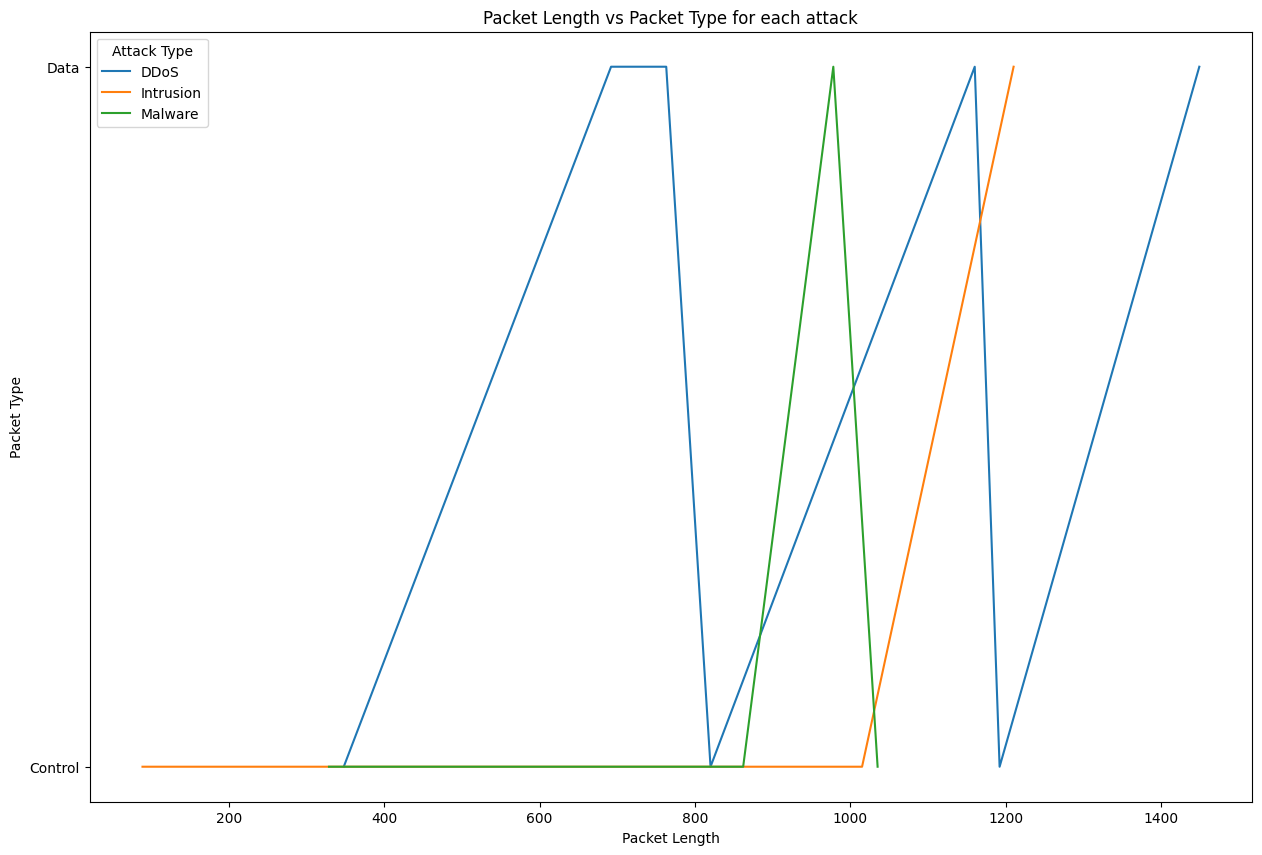

In [9]:
#plot line line graph of packet length vs packet type for each attack ramdomly of 15 rows
plt.figure(figsize=(15,10))
sns.lineplot(x='Packet Length', y='Packet Type', data=df.sample(15), hue='Attack Type')
plt.title('Packet Length vs Packet Type for each attack')
plt.show()


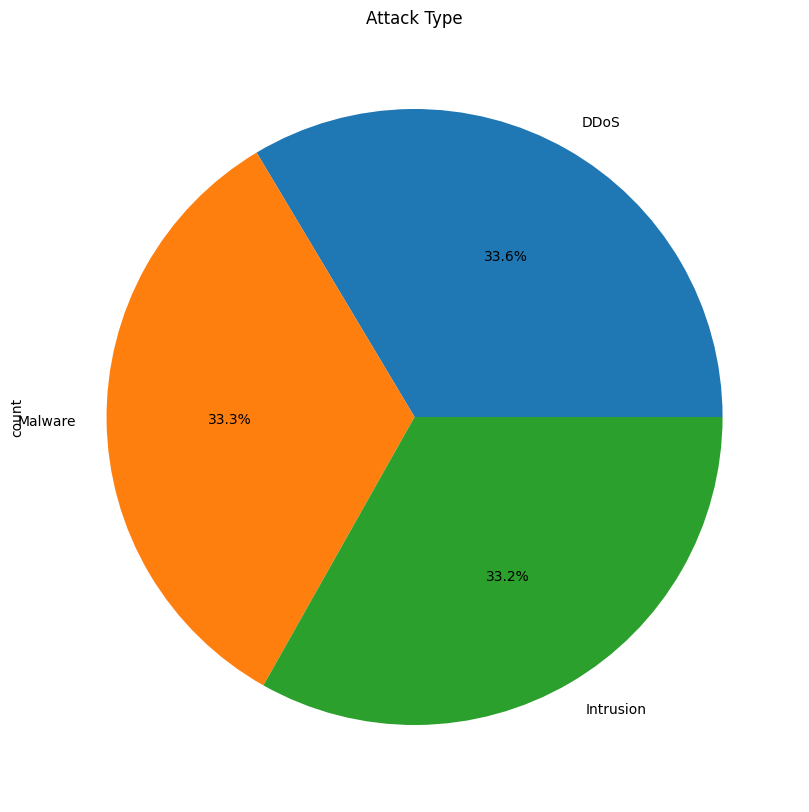

In [10]:
#plot pie chart of attack type of random 15 rows
plt.figure(figsize=(15,10))
df['Attack Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Attack Type')
plt.show()


In [11]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [12]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [13]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [14]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:
#defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [21]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [22]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64